### **Loading Data**

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df.columns = ['id', 'UnNamed', 'Sentiment', "Tweet"]

In [5]:
df.head()

,id,UnNamed,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df.drop(['id', 'UnNamed'], axis=1, inplace=True)

In [7]:
df.head()

,Sentiment,Tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [8]:
df.isna().sum()

Sentiment      0
Tweet        686
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(69768, 2)

### **Word Embedding (Word2Vec)**

In [12]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [13]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
from nltk.tokenize import word_tokenize

def preprocess(text):
    if not isinstance(text, str):
        return []
    return word_tokenize(text.lower())

df['tokens'] = df['Tweet'].apply(preprocess)


In [15]:
df.head()

,Sentiment,Tweet,tokens
0,Positive,I am coming to the borders and I will kill you...,"[i, am, coming, to, the, borders, and, i, will..."
1,Positive,im getting on borderlands and i will kill you ...,"[im, getting, on, borderlands, and, i, will, k..."
2,Positive,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu..."
3,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, on, borderlands, 2, and, i, will..."
4,Positive,im getting into borderlands and i can murder y...,"[im, getting, into, borderlands, and, i, can, ..."


In [16]:
model_w2v = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=4)

In [17]:
model_w2v.save("word2vec_tweets.model")

In [18]:
def get_average_vector(tokens, model, vector_size):
    valid_tokens = [token for token in tokens if token in model.wv]
    if not valid_tokens:
        return np.zeros(vector_size)
    return np.mean(model.wv[valid_tokens], axis=0)

df['tweet_vector'] = df['tokens'].apply(lambda x: get_average_vector(x, model_w2v, 100))

In [19]:
df.head()

,Sentiment,Tweet,tokens,tweet_vector
0,Positive,I am coming to the borders and I will kill you...,"[i, am, coming, to, the, borders, and, i, will...","[-0.13390794, -0.4958999, 0.2785961, 0.6173619..."
1,Positive,im getting on borderlands and i will kill you ...,"[im, getting, on, borderlands, and, i, will, k...","[-0.055030465, -0.5792668, 0.109684706, 0.3721..."
2,Positive,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu...","[-0.06035417, -0.4291084, 0.21780114, 0.324792..."
3,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, on, borderlands, 2, and, i, will...","[-0.25261673, -0.29464626, 0.14401808, 0.66049..."
4,Positive,im getting into borderlands and i can murder y...,"[im, getting, into, borderlands, and, i, can, ...","[-0.0017513257, -0.29327872, 0.15776601, 0.447..."


#### Validation Data

In [20]:
val_df = pd.read_csv("twitter_validation.csv")
val_df.columns = ['id', 'UnNamed', 'Sentiment', "Tweet"]
val_df.drop(['id', 'UnNamed'], axis=1, inplace=True)
val_df.head()

,Sentiment,Tweet
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [21]:
val_df.dropna(inplace=True)
val_df.drop_duplicates(inplace=True)

In [22]:
val_df.shape

(998, 2)

In [23]:
val_df['tokens'] = val_df['Tweet'].apply(preprocess)
val_df['tweet_vector'] = val_df['tokens'].apply(lambda x: get_average_vector(x, model_w2v, 100))

In [24]:
val_df.head()

,Sentiment,Tweet,tokens,tweet_vector
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,"[bbc, news, -, amazon, boss, jeff, bezos, reje...","[-0.22720115, 0.24227229, -0.00855307, -0.0905..."
1,Negative,@Microsoft Why do I pay for WORD when it funct...,"[@, microsoft, why, do, i, pay, for, word, whe...","[0.6030639, -0.42931044, -0.62849677, 0.574646..."
2,Negative,"CSGO matchmaking is so full of closet hacking,...","[csgo, matchmaking, is, so, full, of, closet, ...","[0.08501628, -0.045164958, -0.13110656, 0.3349..."
3,Neutral,Now the President is slapping Americans in the...,"[now, the, president, is, slapping, americans,...","[0.060684524, 0.2225386, -0.3738605, 0.5736348..."
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,"[hi, @, eahelp, i, ’, ve, had, madeleine, mcca...","[0.056892168, -0.23392981, -0.349035, 0.734160..."


### **Data Preprocessing**

In [25]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert list of vectors to array
X_train = np.vstack(df['tweet_vector'].values)
X_val = np.vstack(val_df['tweet_vector'].values)

# Encode labels (e.g., Positive/Negative → 1/0)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df['Sentiment'])
y_val = label_encoder.transform(val_df['Sentiment'])


In [ ]:
X_train 

array([[-0.13390794, -0.49589989,  0.2785961 , ...,  0.94638878,
        -0.47729057, -1.12337792],
       [-0.05503047, -0.57926679,  0.10968471, ...,  1.24820995,
        -0.15721689, -1.28635323],
       [-0.06035417, -0.42910841,  0.21780114, ...,  1.08915961,
        -0.18638279, -1.26245689],
       ...,
       [ 0.29473752, -0.11443182, -0.1954574 , ...,  0.81475788,
        -0.30883843, -0.62481362],
       [ 0.31425279, -0.13861428, -0.17609008, ...,  0.74821037,
        -0.08078515, -0.68325084],
       [ 0.17909814, -0.27972323, -0.17942272, ...,  0.90034264,
        -0.22578567, -0.91199613]])

### **ANN Model Architecture**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [28]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Use softmax and more units if multiclass
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - accuracy: 0.3021 - loss: -2124103552.0000 - val_accuracy: 0.2665 - val_loss: -2558042112.0000
Epoch 2/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 2s 757us/step - accuracy: 0.3035 - loss: -2593535744.0000 - val_accuracy: 0.2665 - val_loss: -3115235584.0000
Epoch 3/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 2s 768us/step - accuracy: 0.3031 - loss: -3157594624.0000 - val_accuracy: 0.2665 - val_loss: -3746228992.0000
Epoch 4/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - accuracy: 0.3031 - loss: -3779343104.0000 - val_accuracy: 0.2665 - val_loss: -4454028288.0000
Epoch 5/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.3061 - loss: -4499461632.0000 - val_accuracy: 0.2665 - val_loss: -5243534336.0000
Epoch 6/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.3044 - loss: -5218740736.0000 - val_accuracy: 0.2665 - val_loss: -6119845888.0000
Epoch 7/10
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - accuracy: 0.3048 - loss: -6151

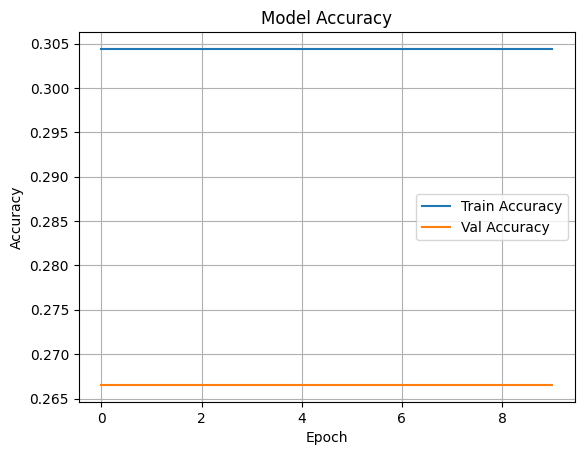

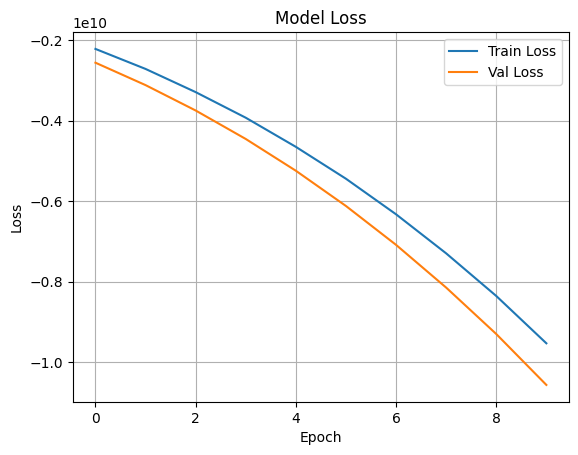

In [32]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [34]:
from nltk.tokenize import word_tokenize
import numpy as np

def preprocess(text):
    return word_tokenize(text.lower())

def get_average_vector(tokens, model, vector_size):
    valid_tokens = [token for token in tokens if token in model.wv]
    if not valid_tokens:
        return np.zeros(vector_size)
    return np.mean(model.wv[valid_tokens], axis=0)

# 🔹 Example Tweet
sample_text = "worst product ever"

# 🔹 Process
tokens = preprocess(sample_text)
vector = get_average_vector(tokens, model_w2v, 100)
vector = vector.reshape(1, -1)  # Reshape for model input

# 🔹 Predict
prediction = model.predict(vector)[0][0]
label = "Positive" if prediction >= 0.5 else "Negative"

print(f"Predicted Sentiment: {label} ({prediction:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Sentiment: Positive (1.00)
